In [1]:
import pandas as pd

# Cargando los datos desde el archivo Excel
file_path = 'data_customer_classification 1.xlsx'
data = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame para revisar la estructura de los datos y tipos de columna
data.head(), data.dtypes

(  customer_id trans_date  tran_amount
 0      CS5295 2013-02-11           35
 1      CS4768 2015-03-15           39
 2      CS2122 2013-02-26           52
 3      CS1217 2011-11-16           99
 4      CS1850 2013-11-20           78,
 customer_id            object
 trans_date     datetime64[ns]
 tran_amount             int64
 dtype: object)

In [2]:
# Agregando las características necesarias: total_spent, max_spent y frequency por cliente
customer_data = data.groupby('customer_id').agg(
    total_spent=pd.NamedAgg(column='tran_amount', aggfunc='sum'),
    max_spent=pd.NamedAgg(column='tran_amount', aggfunc='max'),
    frequency=pd.NamedAgg(column='tran_amount', aggfunc='size')
).reset_index()

# Mostrar las primeras filas del nuevo DataFrame para verificar las nuevas columnas
customer_data.head()

,customer_id,total_spent,max_spent,frequency
0,CS1112,1012,105,15
1,CS1113,1490,98,20
2,CS1114,1432,105,19
3,CS1115,1659,104,22
4,CS1116,857,105,13


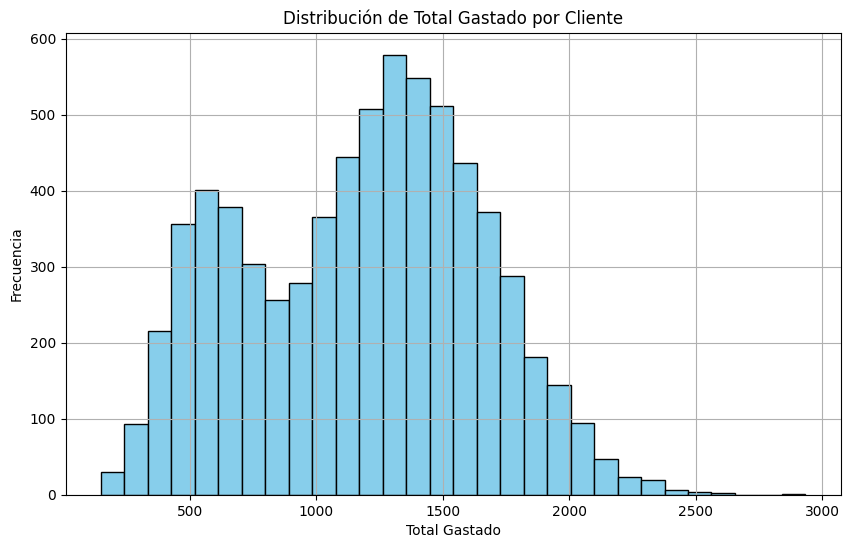

[973.0, 1414.0]

In [3]:
import matplotlib.pyplot as plt

# Visualizando la distribución de total_spent
plt.figure(figsize=(10, 6))
plt.hist(customer_data['total_spent'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Total Gastado por Cliente')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular percentiles para ayudar en la creación de categorías
percentiles = customer_data['total_spent'].quantile([0.33, 0.66]).tolist()
percentiles

In [4]:
# Crear la columna de categorías basada en los percentiles
customer_data['value_category'] = pd.cut(customer_data['total_spent'],
                                         bins=[0, 973, 1414, float('inf')],
                                         labels=['low', 'medium', 'high'])

# Visualizar la distribución de las categorías
category_counts = customer_data['value_category'].value_counts(normalize=True) * 100

# Mostrar la tabla de categorías y la distribución
category_counts, customer_data.head()

(value_category
 high      33.981710
 low       33.038177
 medium    32.980113
 Name: proportion, dtype: float64,
   customer_id  total_spent  max_spent  frequency value_category
 0      CS1112         1012        105         15         medium
 1      CS1113         1490         98         20           high
 2      CS1114         1432        105         19           high
 3      CS1115         1659        104         22           high
 4      CS1116          857        105         13            low)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extracción de características y etiquetas
X = customer_data[['total_spent', 'max_spent', 'frequency']]
y = customer_data['value_category']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificando las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5511, 3), (1378, 3), (5511,), (1378,))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construcción del modelo de red neuronal
model = Sequential([
    Dense(64, input_shape=(3,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convertir las etiquetas a códigos numéricos para usar en Keras
y_train_encoded = y_train.astype('category').cat.codes
y_test_encoded = y_test.astype('category').cat.codes

# Entrenamiento del modelo
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Users\Melis\OneDrive\Documentos\Technical test\Technical test GBM\gbm-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7525 - loss: 0.6409 - val_accuracy: 0.9211 - val_loss: 0.2114
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.1770 - val_accuracy: 0.9519 - val_loss: 0.1283
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1172 - val_accuracy: 0.9628 - val_loss: 0.0995
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.0871 - val_accuracy: 0.9764 - val_loss: 0.0670
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9790 - loss: 0.0647 - val_accuracy: 0.9846 - val_loss: 0.0549
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0534 - val_accuracy: 0.9946 - val_loss: 0.0466
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.9837 - val_loss: 0.0437
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9882 - loss: 0.0425 - val_accuracy: 0.9882 - val_

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

# Informe de clasificación
cr = classification_report(y_test_encoded, y_pred_classes, target_names=['low', 'medium', 'high'])
print("Informe de Clasificación:")
print(cr)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Matriz de Confusión:
[[442   0   0]
 [  1 470   4]
 [  0   0 461]]
Informe de Clasificación:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00       442
      medium       1.00      0.99      0.99       475
        high       0.99      1.00      1.00       461

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


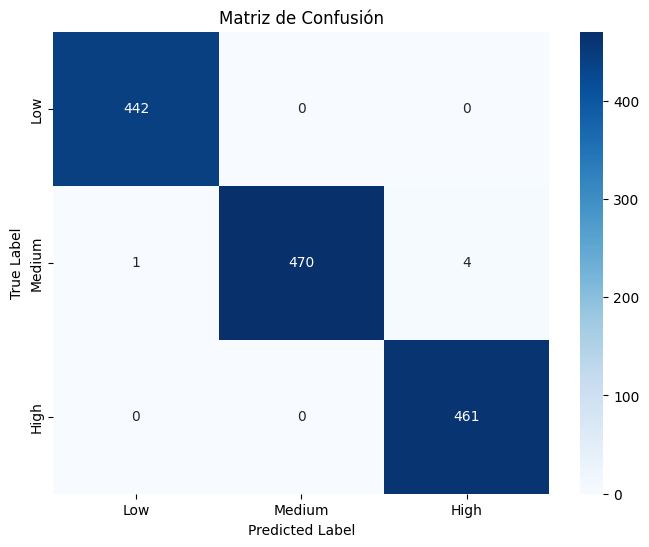

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones y calcular la matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()


In [9]:
import pandas as pd

# Generar informe de clasificación
cr = classification_report(y_test_encoded, y_pred_classes, target_names=['low', 'medium', 'high'], output_dict=True)

# Convertir el informe en DataFrame para una mejor visualización
cr_df = pd.DataFrame(cr).transpose()

# Mostrar el informe como DataFrame
print(cr_df)


              precision    recall  f1-score      support
low            0.997743  1.000000  0.998870   442.000000
medium         1.000000  0.989474  0.994709   475.000000
high           0.991398  1.000000  0.995680   461.000000
accuracy       0.996372  0.996372  0.996372     0.996372
macro avg      0.996380  0.996491  0.996420  1378.000000
weighted avg   0.996398  0.996372  0.996369  1378.000000
